# Знакомство с библиотекой Scikit-Learn

## Представление данных в Scikit-Learn

### Данные как таблица:

In [1]:
import seaborn as sns
sns.set()

In [2]:
iris = sns.load_dataset('iris')
iris
# seaborn читает DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Каждая строка соответствует измеренному цветку, а кол-во строк = кол-ву цветков.

- строки матрицы ``выборки (samples)``, а кол-во строк = ``n_samples``.

Каждый столбец данных относится к конкретному количественному показателю, описывающему данную выборку.

- столбцы матрицы ``признаки (features)``, а кол-во столбцов = ``n_features``.

### Матрица признаков (features matrix)

- это двумерный числовой массив. По традиции его обозначают переменной ``X``.

Предполагается, что матрица признаков двумерна, с формой ``[`` ``n_samples``, ``n_features`` ``]``

- Выборки (то есть строки) всегда соответствуют отдельным объектам, описываемым набором данных (например цветок или объект)

- Признаки (то есть столбцы) всегда соответствуют конкретным наблюдениям (признака), описывающих каждую из выборок колич. образом. Значения признаков как правило представляют собой вещественные числа, но иногда м.б. булевы или дискретные (перечислимые (7 цветов радуги)) значения.

### Целевой массив

- массив меток, который принято обозначать ``y``. Целевой массив обчно одномерен, длинной ``n_samples``.

Значения целевого массива могут быть непрерывными числовыми или дискретными классами/метками.
Бывает двумерный целевой массив ``[`` ``n_samples``, ``n_targets`` ``]``

###### отличительная черта целевого массива от остальных столбцов признаков в том, что он представляет собой величину, значения которой мы хотим *предсказать на основе имеющихся данных*.
Говоря статистическим языком - это зависимая переменная (dependent variable)

In [3]:
# sns.pairplot?
# Parameters
# ----------
# data : `pandas.DataFrame`
#     Tidy (long-form) dataframe where each column is a variable and
#     each row is an observation.
# hue : name of variable in ``data``
#     Variable in ``data`` to map plot aspects to different colors.
# hue_order : list of strings
#     Order for the levels of the hue variable in the palette
# palette : dict or seaborn color palette
#     Set of colors for mapping the ``hue`` variable. If a dict, keys
#     should be values  in the ``hue`` variable.
# vars : list of variable names
#     Variables within ``data`` to use, otherwise use every column with
#     a numeric datatype.
# {x, y}_vars : lists of variable names
#     Variables within ``data`` to use separately for the rows and
#     columns of the figure; i.e. to make a non-square plot.
# kind : {'scatter', 'kde', 'hist', 'reg'}
#     Kind of plot to make.
# diag_kind : {'auto', 'hist', 'kde', None}
#     Kind of plot for the diagonal subplots. If 'auto', choose based on
#     whether or not ``hue`` is used.
# markers : single matplotlib marker code or list
#     Either the marker to use for all scatterplot points or a list of markers
#     with a length the same as the number of levels in the hue variable so that
#     differently colored points will also have different scatterplot
#     markers.
# height : scalar
#     Height (in inches) of each facet.
# aspect : scalar
#     Aspect * height gives the width (in inches) of each facet.
# corner : bool
#     If True, don't add axes to the upper (off-diagonal) triangle of the
#     grid, making this a "corner" plot.
# dropna : boolean
#     Drop missing values from the data before plotting.
# {plot, diag, grid}_kws : dicts
#     Dictionaries of keyword arguments. ``plot_kws`` are passed to the
#     bivariate plotting function, ``diag_kws`` are passed to the univariate
#     plotting function, and ``grid_kws`` are passed to the :class:`PairGrid`
#     constructor.

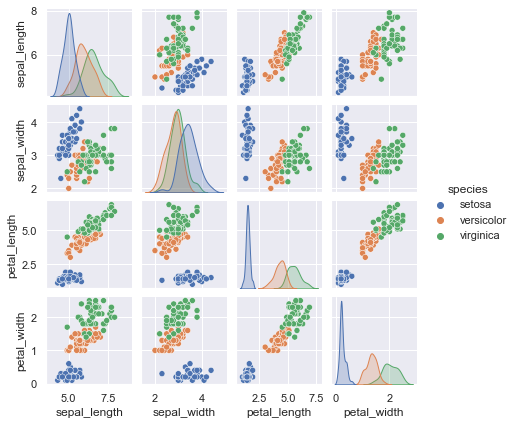

In [4]:
sns.pairplot(iris, hue='species', height=1.5)
# hue= Переменная в ``data`` для сопоставления аспектов графика с разными цветами.
# height= Высота (в дюймах) каждой грани.

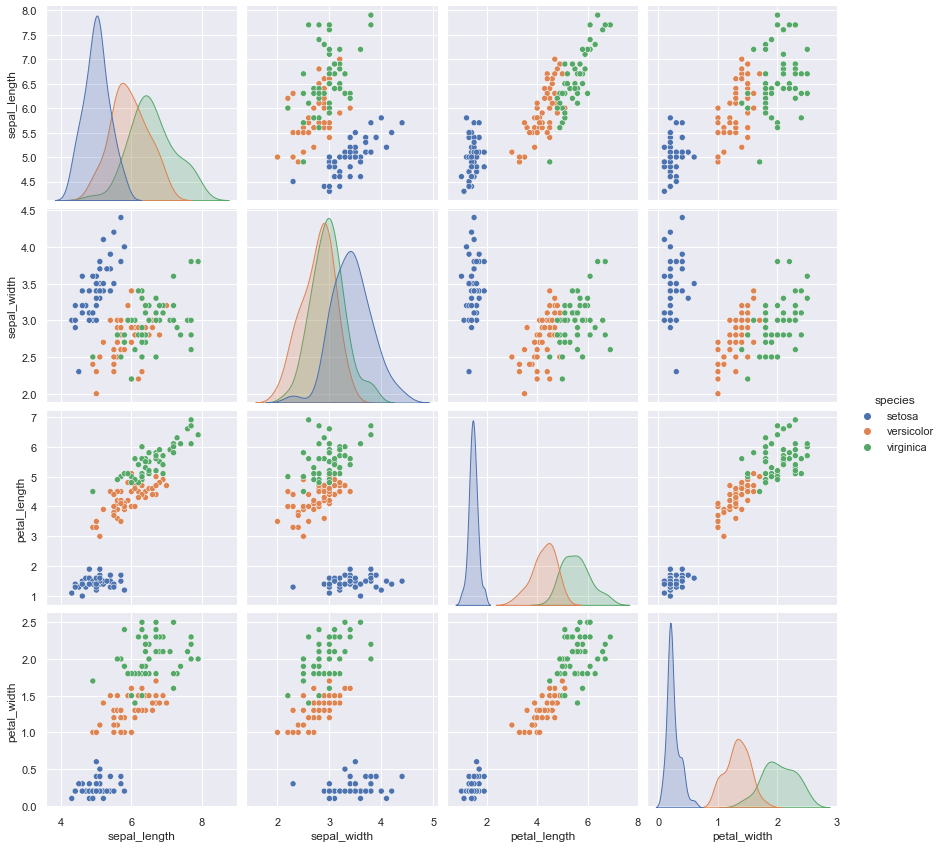

In [5]:
sns.pairplot(iris, hue='species', height=3)
# hue= Переменная в ``data`` для сопоставления аспектов графика с разными цветами.
# height= Высота (в дюймах) каждой грани.

Для использования набора данных Iris в Scikit-Learn мы извлечем *матрицу признаков* и *целевой массив* из объекта DataFrame.

In [6]:
X_iris = iris.drop('species', axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
y_iris.shape

(150,)

## API статистического оценивания библиотеки Scikit-Learn

API Scikit-Learn основан на след. принцыпах:

- ``единообразие`` - интерфейс всех объектов идентичен, и основан на ограниченном наборе методов;
- ``контроль`` - видимость всех задаваемых значений параметров как открытых атрибутов;
- ``ограниченная иерархия объектов`` - классы языка Python используются только для алгоритмов; наборы данных представлены в стандартных форматах NumPy Pandas SciPy, а для имен параметров используются стандартные строки языка Python;
- ``объединение`` - многие из задач машинного обучения можно выразить в виде последовательностей алгоритмов более низкого уровня, и библиотека Scikit-Learn пользуется этим фактом при любой возможности;
- ``разумные значения по умолчанию`` - разумные значения по умолчанию.

### Основы API статистического оценивания

Чаще всего использование API статистического оценивания библиотеки Scikit-Learn включает следующие шаги:

1. Выбор класса модели с помощью импорта соответствующего класса ``оценивателя`` из библиотеки Scikit-Learn.
2. Выбор ``гиперпараметров`` модели путем создания экземпляра этого класса с соответствующими значениями.
3. Компановка данных в ``матрицу признаков`` и ``целевой вектор`` в соответствии с описанным выше.
4. Обучение модели на своих данных посредством вызова метода ``fit()`` экземпляра модели.
5. Применение модели к новым данным:
    - в случае машинного обучения с учителем метки для неизвестных данных обычно предсказывают с помощью метода ``predict()``;
    - в случае машинного обучения без учителя выполняется преобразование свойств данных или вывод их значений посредством методов ``transform()`` или ``predict()``

### Пример обучения с учителем: простая линейная регрессия

In [10]:
import matplotlib.pyplot as plt
import numpy as np

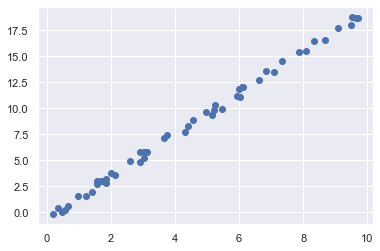

In [11]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x, y)

###### 1. Выбор класса модели.
    - Для расчета модели простой линейной регрессии необходимо импортировать ``класс линейной регрессии``

In [12]:
from sklearn.linear_model import LinearRegression

###### 2. Выбор гиперпараметров модели.

    *Класс модели - не то же самое, что экземпляр модели.*
    
    В зависимости от класса модели может понадобиться ответить на один или несколько следующих вопросов:
    - Хотим ли мы выполнить подбор сдвига прямой (то есть точки пересечения с осью координат)?
    - Хотим ли мы нормализовать модель?
    - Хотим ли мы сделать модель более гибкой, выполнив предварительную обработку признаков?
    - Какая степень регуляризации должна быть у нашей модели?
    - Сколько компонент модели мы хотели бы использовать?

    Результаты этих решений часто называют ``гиперпараметрами``, т.е. параметрами, задаваемыми до обучения модели на данных.

In [13]:
# по сути именованые параметры
# fit_intercept - хотим ли подобрать точку пересечения с осью координат

model = LinearRegression(fit_intercept=True)
# создали экземпляр модели

In [14]:
model

LinearRegression()

При создании экземпляра модели происходить только сохранение этих гиперпараметров.

Мы все еще не применили модель ни к каким данным:
- API Scikit-Learn четко разделяет ``выбор модели`` и ``применение модели к данным``

###### 3. Формирование из данных матриц признаков и целевого вектора.

In [15]:
# матрица признаков
X = x[:, np.newaxis]
X.shape

(50, 1)

###### 4. Обучение модели

In [16]:
# целевой вектор
y

array([ 7.460387  , 18.78941895, 14.57937778, 11.86799703,  2.71827279,
        3.04176464,  0.25016475, 16.51950578, 11.06752752, 13.48678189,
       -0.19963282, 18.66954608, 16.47759033,  3.60353554,  2.91743385,
        3.21078628,  5.22576908, 10.29732561,  7.71345102,  5.81146974,
       12.00930266,  1.98859289,  4.84841509,  7.14269829,  8.82825703,
       15.4325264 ,  3.76474599,  9.35873342, 11.20675711,  0.04487731,
       12.01400046,  3.0337806 ,  0.63192988, 18.0412691 , 18.62362298,
       15.49313028,  5.82188156,  1.59099975, 13.57187327,  8.2752648 ,
        1.56035894,  9.61678299,  0.44855547, 17.74768524,  4.94656681,
       12.74424128,  5.75695435,  9.82890144,  9.95962471,  2.80498054])

In [17]:
y.shape

(50,)

In [18]:
model.fit(X, y)

LinearRegression()

Команда ``fit()`` выполняет вычисления, и *сохраняет результаты вычислений в атрибутах модели* доступных для просмотра.

По традиции все параметры модели, полученые в процессе вычислений ``fit()`` содержат в конце ``знак_``.

In [19]:
model.coef_
# угловой коэффициент

array([2.00660766])

In [20]:
model.intercept_
# точка пересечения с осью координат

-0.5350275750800026

###### 5. Предсказание меток для новых данных.
    
    После обучения модели главная задача ML с учителем заключается в вычислении с ее помощью значений для новых данных, не являющихся частью обучающей последовательности. Сделать это можно посредством метода ``predict()``.
    
    Для нашего примера новые данные будут сеткой *x*-значений, и нас интересует какие *y*-значения предсказывает модель:

In [21]:
xfit = np.linspace(-1, 11)

In [22]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

Как и раньше, эти *x*-значений требуется преобразовать в матрицу признаков ``[`` ``n_samples``, ``n_features`` ``]``, после чего их можно подать на вход модели:

In [23]:
Xfit = xfit[:, np.newaxis]

In [24]:
yfit = model.predict(Xfit)

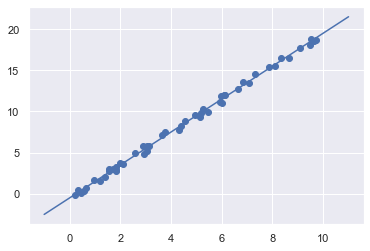

In [25]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

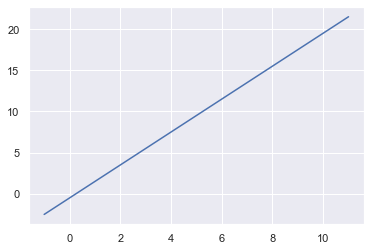

In [26]:
plt.plot(xfit, yfit)

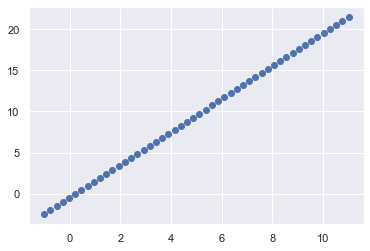

In [27]:
plt.scatter(xfit, yfit)

### Пример обучения с учителем: классификация набора данных Iris

Насколько хорошо мы сможем предсказать метки остальных данных с помощью модели, обученной на некоторой части данных набора Iris?

Для этого воспользуемся простой обобщенной моделью, известной под названием *Гауссов наивный байесовский классификатор*, исходещей из допущения, что все классы взяты из выровненного по осям координат Гауссова распределения.

*Гауссов наивный байесовский классификатор* в силу отсутствия гиперпараметров и высокой производительности - хороший кандидат на роль эталонной классификации.

Необходимо разделить данные на ``обучающую последовательность (training set)`` и ``контрольную последовательность (testing set)``.
Это можно сделать вручную, но можно воспользоваться вспомогательной ф-ией ``train_test_split()``

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [30]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [32]:
ytrain

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
          ...    
133     virginica
137     virginica
72     versicolor
140     virginica
37         setosa
Name: species, Length: 112, dtype: object

In [33]:
from sklearn.naive_bayes import GaussianNB  # 1. Выбираем класс модели
model = GaussianNB()                        # 2. Создаем экземпляр модели
model.fit(Xtrain, ytrain)                   # 3. Обучаем модель на данных
y_model = model.predict(Xtest)              # 4. Предсказываем значения для новых данных

###### Воспользуемся утилитой ``accuracy_score`` для выяснения того, какая часть предсказанных меток соответствует истинному значению:

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# точность превышает 97%

0.9736842105263158

### Пример обучения без учителя: понижение размерности набора Iris

Данные Iris - четырехмерны, поскольку для каждой выборки зафиксировано 4 признака.

Задача понижения размерности заключается в выяснении, существует ли представление более низкой размерности, сохранающее существенные признаки данных.

Зачастую понижение размерности используется для облегчения визуализации данных, поскольку гораздо проще строить график в 2d чем в 4d и более.

В данном примере используем ``метод главных компонент (PCA)``.

Наша модель должна будет позвратить 2 компоненты, т.е. двумерное представление данных.

In [35]:
from sklearn.decomposition import PCA # 1. Выбираем класс модели
model = PCA(n_components=2)           # 2. Создаем экземпляр модели с гиперпараметрами
model.fit(X_iris)                     # 3. Обучаем модель на данных. y - мы не указываем, т.к. учителя нет
X_2D = model.transform(X_iris)        # 4. Преобразуем данные в двумерные

построим график полученных результатов. Сделать это быстрее всего можно, вставив результаты в исходные объект DataFrame Iris 
и воспользовавшись ф-ией ``sns.lmplot``

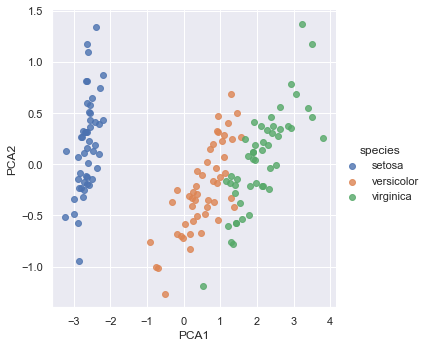

In [37]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

In [39]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


### Обучение без учителя: кластеризация набора данных Iris

Алгоритм кластеризации пытается выделить группы данных безотносительно к каким-либо меткам.

Мощный алгоритм кластеризации ``Смесь Гауссовых распределений (Gaussian mixture model, GMM)``.

Метод GMM состоит в попытке моделирования данных в виде набора Гауссовых пятен.

In [40]:
from sklearn.mixture import GaussianMixture                     # 1. выбираем класс модели
model = GaussianMixture(n_components=3, covariance_type='full') # 2. создаем экземпляр модели с гиперпараметрами
model.fit(X_iris)                                        # 3. Обучаем модель на данных. y - не указываем, т.к. без учителя
y_gmm = model.predict(X_iris)                            # 4. Определяем метки кластеров

Добавим столбец ``cluster`` в DataFeame Iris и посроим график

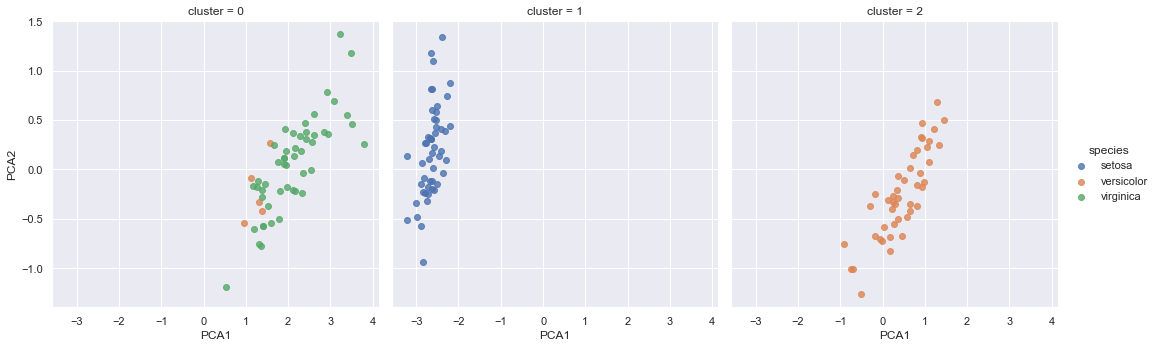

In [41]:
iris['cluster'] = y_gmm
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species',
           col='cluster', fit_reg=False)

In [42]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0


## Прикладная задача: анализ рукописных цифр

### Загрузка и визуализация цифр

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()

In [44]:
digits.images.shape

(1797, 8, 8)

In [45]:
import matplotlib.pyplot as plt

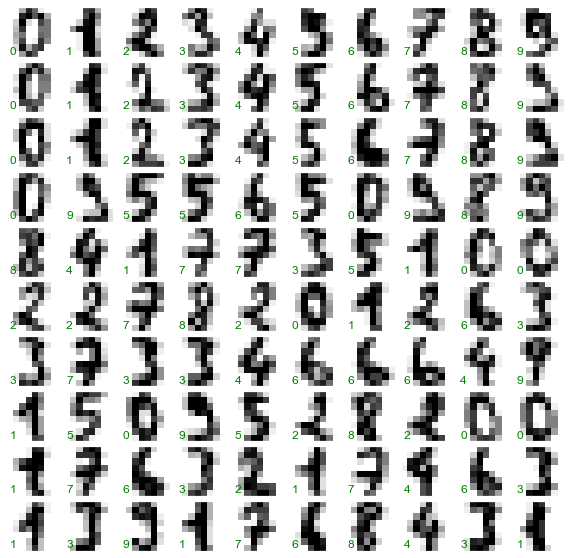

In [48]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
              interpolation='nearest')
    ax.text(0.05, 0.05, 
            str(digits.target[i]),
            transform=ax.transAxes,
            color='green')

 Для работы с этими данными, мы должны получить их двумерное представление ``[`` ``n_samples``, ``n_features`` ``]``.
 
 Для этого каждый рисунко можно разложить на пиксели, и каждый пиксель трактовать как признак. Массив из 64 пикселов.
 
 Кроме этого нам понадобится целевой массив, задающий для каждого рисунка (цифры) определенную метку (цифру).
 
 Эти 2 параметра встроены в набор данных цифр в виде атрибутов ``data`` и ``target``

In [50]:
X = digits.data
X.shape
# 1797 выборок и 64 признака

(1797, 64)

In [53]:
y = digits.target
y.shape

(1797,)

### Обучение без учителя: понижение размерности

In [54]:
from sklearn.manifold import Isomap         # 1. выбираем класс модели
iso = Isomap(n_components=2)                # 2. создаем экземпляр модели с гиперпараметрами
iso.fit(digits.data)                        # 3. Обучаем модель на данных. y - не указываем, т.к. без учителя
data_projected = iso.transform(digits.data) # 4. Преобразуем данные в двумерные
data_projected.shape

(1797, 2)

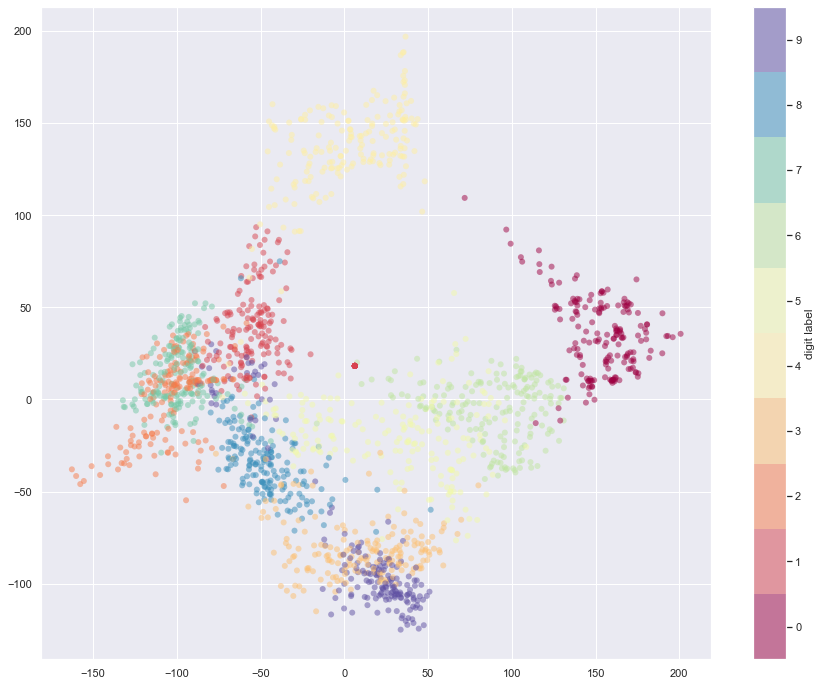

In [63]:
plt.figure(figsize=(15, 12))
plt.scatter(data_projected[:, 0], data_projected[:, 1],
            c=digits.target,
            edgecolors='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

### Классификация цифр

Разобьем данные на обучающую и контрольную последовательности

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [65]:
from sklearn.naive_bayes import GaussianNB # 1. выбираем класс модели
model = GaussianNB()                       # 2. создаем экземпляр модели с гиперпараметрами
model.fit(Xtrain, ytrain)                  # 3. Обучаем модель на данных
y_model = model.predict(Xtest)             # 4. Предсказываем значения для новых данных

Теперь мы можем оценить точность предсказаний сравнив значения из контрольной последовательности с предсказаниями

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# точность модели оказалась 83%

0.8333333333333334

Как понять где наша модель ошиблась?

``Матрица различий (confusion matrix)``

Text(93.14000000000001, 0.5, 'реальное значение')

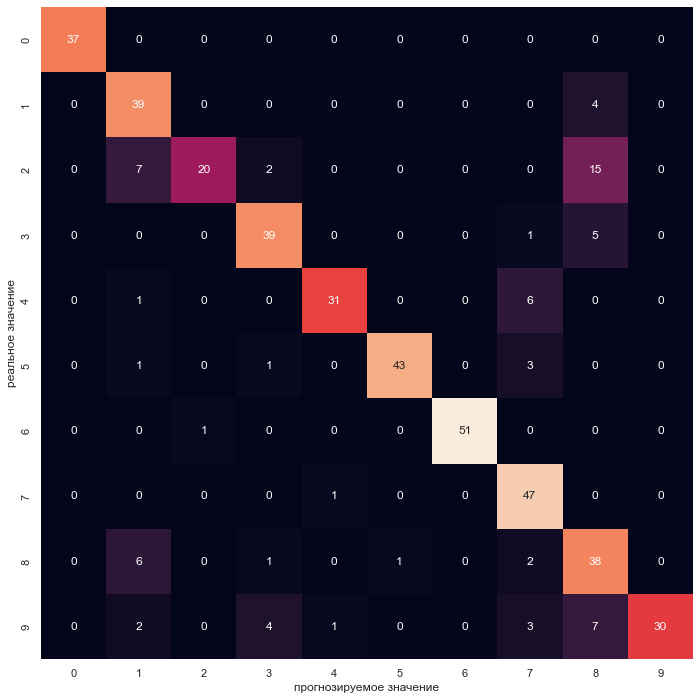

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.set(rc={'figure.figsize':(12, 12)}) # задание размеров в seaborn
sns.heatmap(mat,
            square=True,
            annot=True,
            cbar=False)
plt.xlabel('прогнозируемое значение')
plt.ylabel('реальное значение')
# видим, что он часто трактует 2 как 1 или 8

Еще один способ проверки:
    Построить входные данные вместе с предсказанными метками.

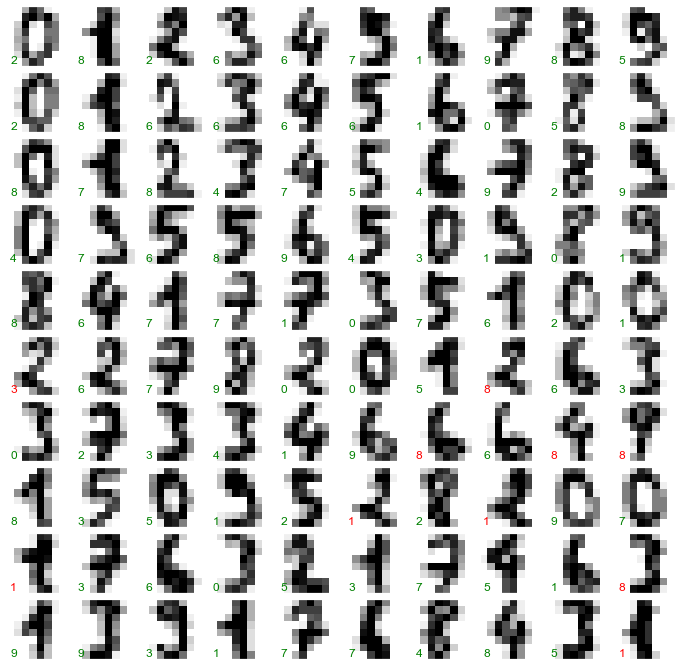

In [72]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],
             cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i]==y_model[i]) else 'red')